# Frage 1: Wie viele Exemplare gibt es für die jeweils vordefinierten Titelarten?

## Import der Bibliotheken

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importieren der Datensätze und Aufbereitung

In [2]:
# Datenset importieren
url = "https://datasets.imdbws.com/title.akas.tsv.gz"

In [3]:
# CSV Datei benennen
title_information_file = "title_information.csv"

In [4]:
# lokaler Download der Datei
urllib.request.urlretrieve(url, title_information_file) 

('title_information.csv', <http.client.HTTPMessage at 0x266ac247310>)

In [5]:
# Auslesen der Datei und Speichern in einer Variablen
title = pd.read_csv(title_information_file, compression='gzip', sep = "\t") 

C:\Users\DenniSandra\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# Anzeigen der Datei 
title 

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
32349275,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
32349276,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
32349277,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
32349278,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [7]:
#Filterung nach der Spalte types
title.types

0           imdbDisplay
1                    \N
2           imdbDisplay
3           imdbDisplay
4           imdbDisplay
               ...     
32349275             \N
32349276             \N
32349277             \N
32349278    imdbDisplay
32349279       original
Name: types, Length: 32349280, dtype: object

In [8]:
# Berechnung vom Vorkommen der einzelnen Titelarten in der Spalte types
title.groupby(["types"]).sum()

,ordering
types,
\N,107283315
alternative,605703
alternativedvd,94
alternativefestival,58
alternativetv,106
alternativevideo,8
alternativeworking,45
dvd,178728
dvdimdbDisplay,2701


In [9]:
# Benennung des neuen Datensets
grouped_title = title.groupby(["types"]).sum()

In [10]:
# other Datenmenge < 3000
other_data = grouped_title[grouped_title["ordering"] < 3000]
# Datenmenge > 3000 ohne \N
grouped_title_new = grouped_title[grouped_title["ordering"] > 3000]
grouped_title_new = grouped_title_new [1:]
# Datenmenge \N
not_known = grouped_title[0:1]

# other in die Datenmenge einbringen (Dafür wird aus other ein Dictionary, damit es in die Grafik eingebunden werden kann)
other = {"ordering":other_data.ordering.sum()}

grouped_title_new = grouped_title_new.append(other, ignore_index =True)
grouped_title_new.index = ['alternative', 'dvd', 'festival', 'imdbDisplay', 'original', 'tv',
       'video', 'working','other']

#### Grafische Darstellung

<AxesSubplot:ylabel='ordering'>

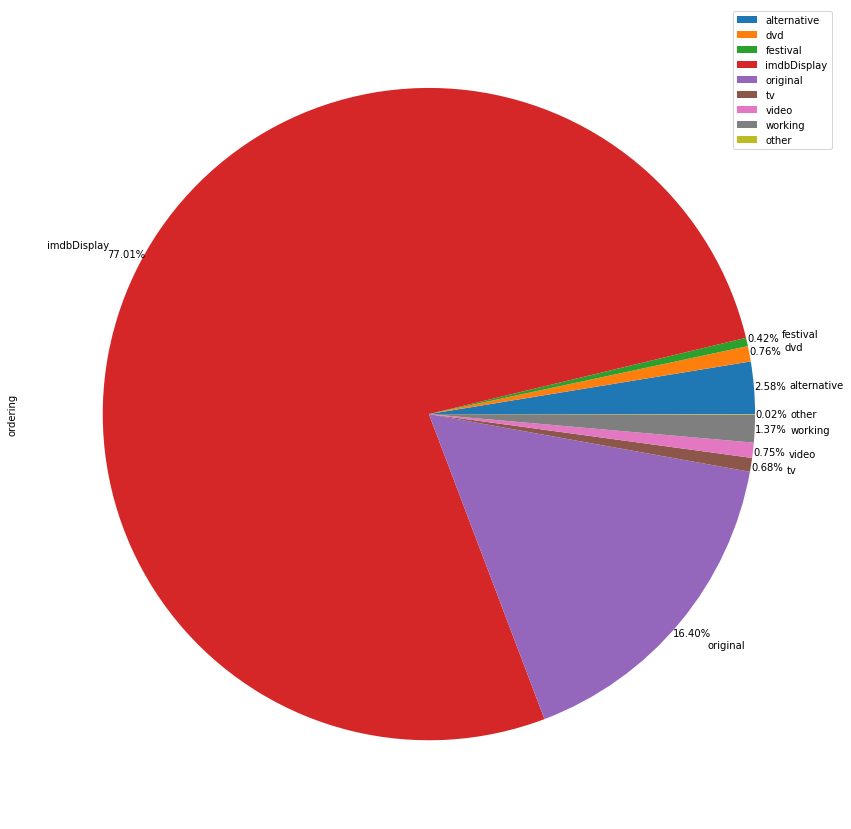

In [11]:
# Darstellung eines Tortendiagramms, welches die undefinierten Titelarten vernachlässigt und jene mit einer Datenmenge, die kleiner als 3000 ist, unter "other" zusammenfasst
grouped_title_new.plot.pie(y = 'ordering', figsize = (15, 15), autopct = "%1.2f%%", pctdistance=1.05, labeldistance=1.11)


<AxesSubplot:ylabel='ordering'>

C:\Users\DenniSandra\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DenniSandra\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


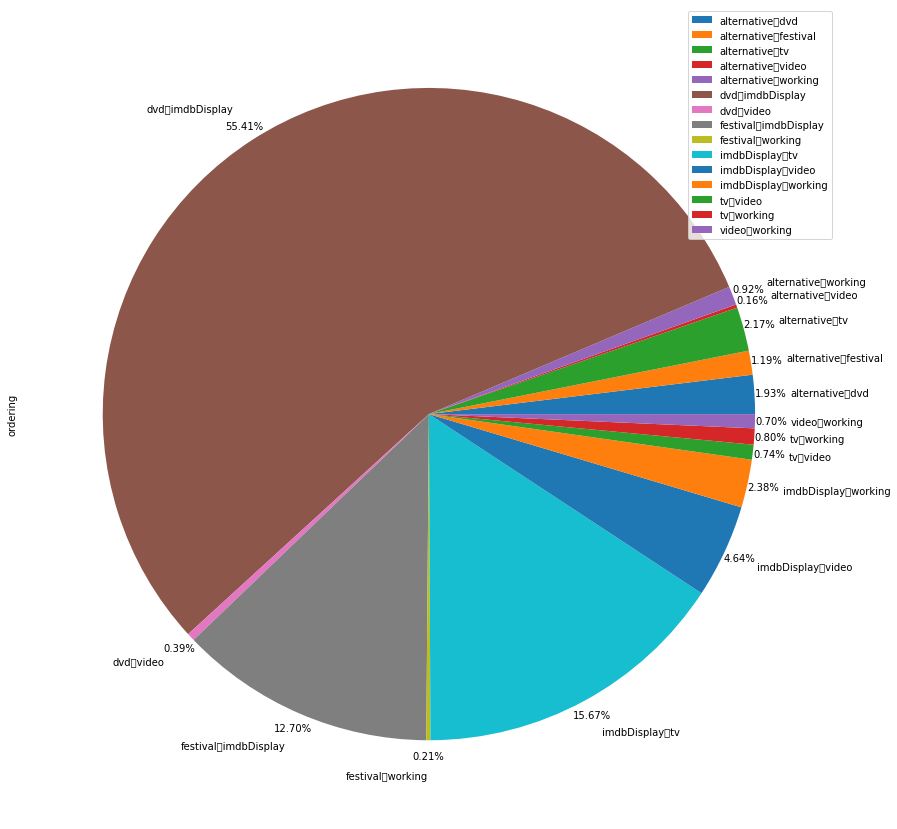

In [12]:
# Darstellung eines Tortendiagramms, welches ausschließlich die Titelarten mit einer kleineren Datenmenge unter 3000 (vorher unter "other" zusammengefasst) anzeigt
# Die 100% dieses Diagramms entsprechen dem Gesamtanteil von 0.02% des vorherigen
other_data.plot.pie(y = 'ordering', figsize = (15, 15), autopct = "%1.2f%%", pctdistance=1.05, labeldistance=1.11)